In [1]:
import torch
import numpy as np 
import matplotlib.pyplot as plt
import copy

from tqdm import tqdm
from models import FFGC
from plotting_functions import *

In [2]:
res = 64
x = np.linspace(-1, 1, res)*2*np.pi
y = np.linspace(-1, 1, res)*2*np.pi
xx, yy = np.meshgrid(x,y)
mesh = np.stack([xx.ravel(), yy.ravel()], axis = -1)
space_maps = mesh.T.reshape(-1,res,res)

In [3]:
def ratemaps_fn(f, mesh, device):
    activity = f(torch.tensor(mesh.astype("float32"), device = device)).detach().cpu().numpy()
    activity = activity.T.reshape(-1,res,res)
    return activity

In [4]:
model = FFGC()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.load()

## Show scaled and sorted (on scaled, mean, absolute activity) ratemaps

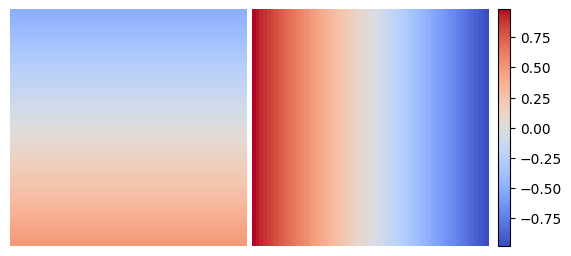

In [10]:
# set the output unit ID and which layer to visualize
output_unit = 0
layer = 0 # ----> CHANGE THIS TO VISUALIZE DIFFERENT LAYERS <----

layer *= 2
weight = model.rg[layer].weight.detach().cpu().numpy()[output_unit][:,None,None]
weighted_ratemaps = ratemaps_fn(model.rg[:layer], mesh, device=device)*weight
sort_idxs = np.argsort(abs(np.sum(weighted_ratemaps,axis=(1,2))))[::-1]
vmin = np.min(weighted_ratemaps)
vmax = np.max(weighted_ratemaps)
vrange = max(abs(vmin), abs(vmax))
multiimshow(weighted_ratemaps[sort_idxs], figsize=(5,5), cmap='coolwarm', vmin=-vrange, vmax=vrange);

# Show ratemap(s) - including (norm) relu

(-0.5, 63.5, 63.5, -0.5)

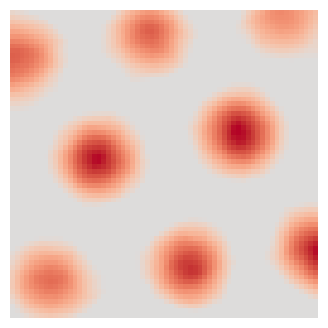

In [16]:
# choose layer (rg[:2], rg[:4], model)
f = model # ----> CHANGE THIS TO VISUALIZE DIFFERENT LAYERS <----

fig, ax = plt.subplots(figsize=(4,4))
ratemaps = ratemaps_fn(f, mesh, device)
# set output color range
vmin = np.min(ratemaps[output_unit])
vmax = np.max(ratemaps[output_unit])
vrange = max(abs(vmin), abs(vmax))
ax.imshow(ratemaps[output_unit], cmap='coolwarm', vmin=-vrange, vmax=vrange)
ax.axis('off')

# Show cumulative sum of scaled previous layer activations

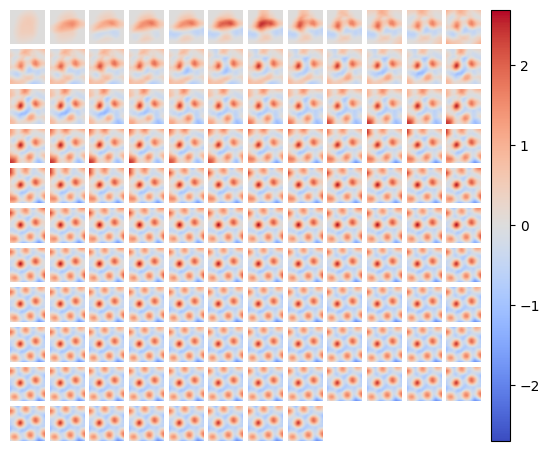

In [20]:
# set the output unit ID and which layer to visualize
output_unit = 0
layer = 2 # ----> CHANGE THIS TO VISUALIZE DIFFERENT LAYERS <----

layer *= 2
weight = model.rg[layer].weight.detach().cpu().numpy()[output_unit][:,None,None]
weighted_ratemaps = ratemaps_fn(model.rg[:layer], mesh, device=device)*weight
sort_idxs = np.argsort(abs(np.sum(weighted_ratemaps,axis=(1,2))))[::-1]
cumulative_weighted_ratemaps = np.cumsum(weighted_ratemaps[sort_idxs], axis=0)
vmin = np.min(cumulative_weighted_ratemaps)
vmax = np.max(cumulative_weighted_ratemaps)
vrange = max(abs(vmin), abs(vmax))
multiimshow(cumulative_weighted_ratemaps, figsize=(5,5), cmap='coolwarm', vmin=-vrange, vmax=vrange);